In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import resnet
from tensorflow.keras.preprocessing import image

In [44]:
# Load VGG16 model pre-trained on ImageNet
model = VGG16(weights='imagenet', include_top=False)
model = resnet.ResNet50()


# Load and preprocess an image
img_path = 'image.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Scale to [0, 1]
print(img_array.shape)
# Get the output of the first convolutional layer
layer_outputs = model.layers[2].output
feature_map_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)

(1, 224, 224, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


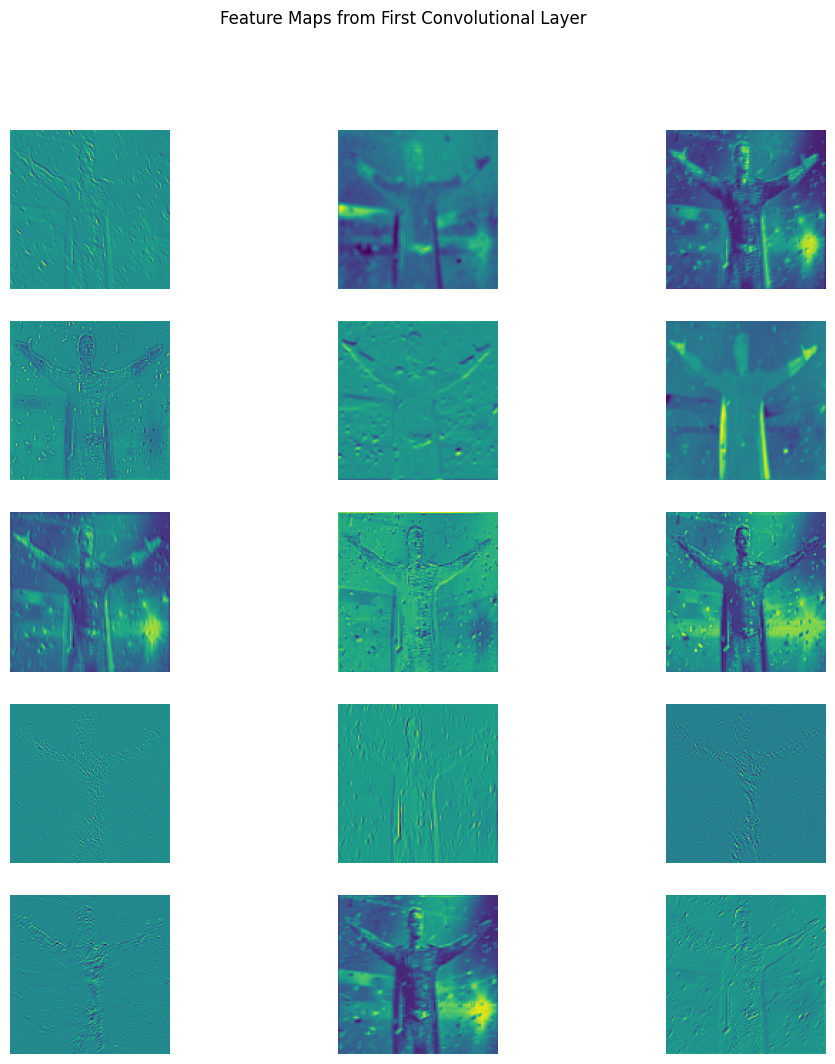

In [45]:
# Get feature maps
feature_maps = feature_map_model.predict(img_array)

# Visualize the first few feature maps
num_feature_maps = feature_maps.shape[-1]
plt.figure(figsize=(12, 12))
for i in range(min(15, num_feature_maps)):  # Display first 6 feature maps
    plt.subplot(5, 3, i + 1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.suptitle('Feature Maps from First Convolutional Layer')
plt.show()

In [38]:
for i in model.layers:
    print(i)

<InputLayer name=input_layer_10, built=True>
<ZeroPadding2D name=conv1_pad, built=True>
<Conv2D name=conv1_conv, built=True>
<BatchNormalization name=conv1_bn, built=True>
<Activation name=conv1_relu, built=True>
<ZeroPadding2D name=pool1_pad, built=True>
<MaxPooling2D name=pool1_pool, built=True>
<Conv2D name=conv2_block1_1_conv, built=True>
<BatchNormalization name=conv2_block1_1_bn, built=True>
<Activation name=conv2_block1_1_relu, built=True>
<Conv2D name=conv2_block1_2_conv, built=True>
<BatchNormalization name=conv2_block1_2_bn, built=True>
<Activation name=conv2_block1_2_relu, built=True>
<Conv2D name=conv2_block1_0_conv, built=True>
<Conv2D name=conv2_block1_3_conv, built=True>
<BatchNormalization name=conv2_block1_0_bn, built=True>
<BatchNormalization name=conv2_block1_3_bn, built=True>
<Add name=conv2_block1_add, built=True>
<Activation name=conv2_block1_out, built=True>
<Conv2D name=conv2_block2_1_conv, built=True>
<BatchNormalization name=conv2_block2_1_bn, built=True>
<Act

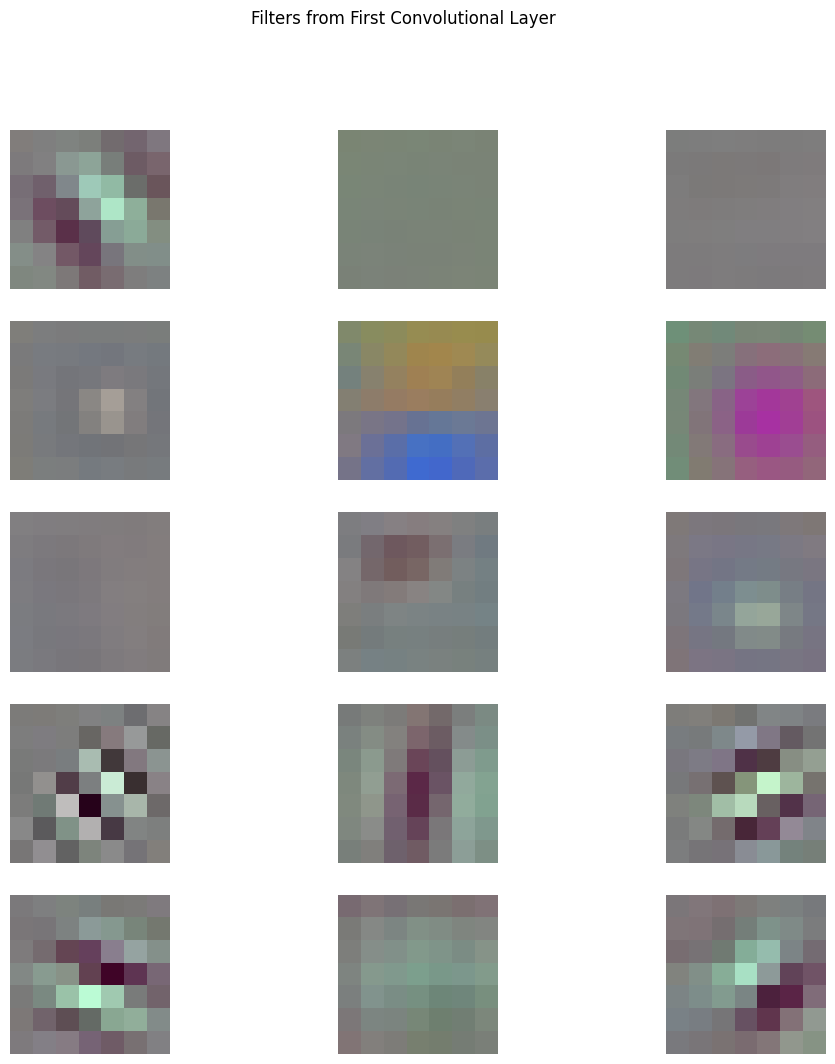

In [39]:
# Get the weights of the first convolutional layer
filters, biases = model.layers[2].get_weights()

# Normalize filter values to 0-1 for better visualization
filters = (filters - filters.min()) / (filters.max() - filters.min())

# Plot the filters
plt.figure(figsize=(12, 12))
for i in range(min(15, filters.shape[3])):  # Display first 6 filters
    plt.subplot(5, 3, i + 1)
    plt.imshow(filters[:, :, :, i], cmap='viridis')
    plt.axis('off')
plt.suptitle('Filters from First Convolutional Layer')
plt.show()


In [31]:
filters.shape

(7, 7, 3, 64)